Using random forest Regressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# loading the csv data to pandas dataframe
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# GLD=Gold prices, which we are gonna predict, based on stock prices
gold_data # first and last 5 rows will be printed
# Get to know it is quite a large data, good for analysis

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Positive correlation and Negative Correlation :

In [13]:
correlation_spear = gold_data.corr(method='spearman')


<ipython-input-13-adddc52468d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_spear = gold_data.corr(method='spearman')


In [14]:
correlation_spear

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.136643,-0.677351,-0.169788,-0.679116
GLD,0.136643,1.000000,0.011606,0.839529,0.003792
USO,-0.677351,0.011606,1.000000,0.410791,0.837178
SLV,-0.169788,0.839529,0.410791,1.000000,0.376432
EUR/USD,-0.679116,0.003792,0.837178,0.376432,1.000000


In [15]:
correlation_pearson=gold_data.corr()

<ipython-input-15-7416095be898>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_pearson=gold_data.corr()


In [18]:
correlation_pearson

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

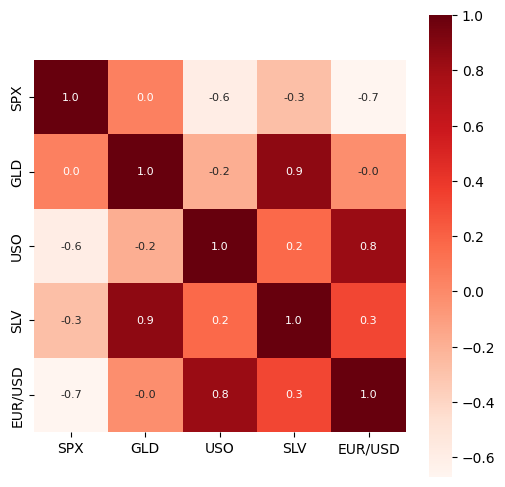

In [25]:
# constructing the heatmap
plt.figure(figsize=(6,6))
sns.heatmap(correlation_pearson, cbar=True, square=True,fmt='.1f', annot=True, annot_kws={'size':8},cmap='Reds')

<Axes: >

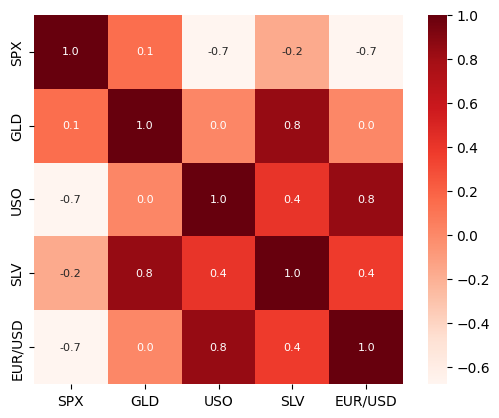

In [21]:
sns.heatmap(correlation_spear,cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8},cmap='Reds')

In [26]:
# Gold price : SPX, USD se totally independend hai
# Only effectively gold se silver hi correlated hai vo bhi strong positively

In [27]:
print(correlation_pearson['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-29-36ae103ec6a8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

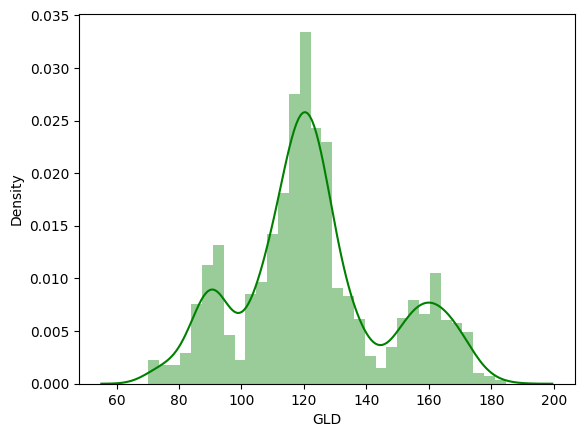

In [29]:
# checking the distribution of gold price
sns.distplot(gold_data['GLD'],color='green')
# density is nothing but number of values : More density means more number of values in that range

In [30]:

X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [31]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [32]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting features and labels

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=3)
# 2200 bahut hain data points, so 70% pr train kr rha

In [39]:
print(X.shape, x_train.shape, x_test.shape)

(2290, 4) (1603, 4) (687, 4)


# Random forest Regressor

In [37]:
regressor=RandomForestRegressor()

In [38]:
# Training the model
regressor.fit(x_train, y_train)

RandomForestRegressor()

Prediction on the test data

In [40]:
test_data_prediction=regressor.predict(x_test)

In [41]:
print(test_data_prediction)

[163.61349909 127.31719988 124.31573778 119.78079911 126.34959866
  85.23889811 171.75370146 138.66960136 106.52090125 132.78480163
 120.91719933 124.81240036 143.60809697 104.62369956  80.95609898
 119.48440017 140.51569874  90.67850056  91.54679919 128.19320192
 125.57450088 147.51369935 117.05090139 152.28550089 129.27940071
 129.67510059 118.21610105 111.30580012 166.53610254 156.57760014
 125.98920186 152.87820128 126.96409984 122.63019762 116.88670088
 154.70760052 115.01300002 120.48680161 103.98050177 106.35010035
 134.65429858  86.32939943 155.8365012  121.35910023 122.33080114
 154.20230193 120.42490017 116.35100023 168.90030252 116.52430064
 137.49100162 161.77869896 158.4496002  153.36740127 124.51910004
 117.33800006 167.00140061 117.30489937 165.67710048  84.12789997
 121.42549944 122.1038001  120.03449997 172.01629803 119.18479938
 180.71099566 162.07650258 141.26690262 116.47399961  92.63880052
 171.94429918 117.83140001 116.97119936 125.68809962 147.41139816
  91.66750

In [42]:
# comparing predicted and actual values : R2 score se
error_score=metrics.r2_score(y_test, test_data_prediction)
print("Test pr R squared error ",error_score)

Test pr R squared error  0.9868295507707993


In [43]:
# remember there is no cutoff for value of R2 as error to tell accurate or worse model

In [44]:
#COMPARE the actual value and predicted values

In [45]:
Y_TEST=list(y_test)

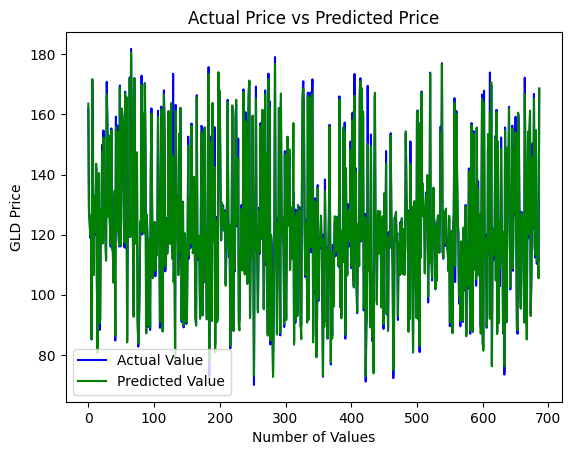

In [47]:
plt.plot(Y_TEST, color='blue',label='Actual Value')
plt.plot(test_data_prediction, color='green',label='Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel('Number of Values')
plt.ylabel("GLD Price")
plt.legend() # will work based on the labels of plt.plot
plt.show()
# mostly actual and predicted are overlapping = similar result

In [48]:
x_test.head()

,SPX,USO,SLV,EUR/USD
863,1236.469971,37.880001,30.490000,1.337167
1351,1836.250000,36.689999,20.969999,1.372119
2284,2672.629883,14.100000,15.520000,1.193374
533,1086.839966,34.770000,17.860001,1.211402
2247,2726.800049,12.350000,15.530000,1.241665


Making a predictive system

In [49]:
input_data=(4444.44,44.44,44.44,1.44)
input_array=np.asarray(input_data)
input_reshaped=input_array.reshape(1,-1)
print("Predicted prize of unknown gold stock ",regressor.predict(input_reshaped))

Predicted prize of unknown gold stock  [147.63800005]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [50]:
Y_TEST

[161.990005,
 127.580002,
 124.57,
 118.970001,
 125.720001,
 85.129997,
 171.470001,
 155.330002,
 108.089996,
 130.589996,
 119.82,
 124.599998,
 142.380005,
 105.699997,
 80.760002,
 123.709999,
 139.050003,
 88.25,
 92.309998,
 127.839996,
 126.300003,
 149.880005,
 117.730003,
 154.669998,
 130.559998,
 130.619995,
 119.769997,
 112.059998,
 170.850006,
 157.770004,
 126.230003,
 152.990005,
 128.830002,
 122.900002,
 115.989998,
 155.360001,
 116.010002,
 121.129997,
 104.68,
 107.730003,
 133.509995,
 84.769997,
 159.300003,
 121.239998,
 122.959999,
 156.300003,
 119.68,
 116.080002,
 169.630005,
 116.099998,
 135.199997,
 161.960007,
 159.460007,
 151.619995,
 124.389999,
 115.779999,
 167.559998,
 115.550003,
 165.800003,
 84.459999,
 122.129997,
 122.07,
 119.330002,
 172.339996,
 119.410004,
 181.809998,
 160.630005,
 135.110001,
 114.739998,
 93.129997,
 172.100006,
 117.75,
 118.519997,
 124.790001,
 145.649994,
 91.230003,
 82.75,
 89.220001,
 102.839996,
 124.150002,
 1